# Covariance matrix example

In [135]:

import numpy as np

x = [1, 2, 4]
y = [4, 2, 1]
# datamtrix = np.array([x, y])
covmatrix = np.cov([x, y], rowvar=False)
print(covmatrix)

[[ 4.5  0.  -4.5]
 [ 0.   0.   0. ]
 [-4.5  0.   4.5]]


# Principal Component analysis (PSA) & Covariance matrix

Original Code Source: https://nirpyresearch.com/cricket-thermometer-intro-pca-python/ was modified and extended by D.U.

In [230]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
from pandas import read_csv

# Read the data
data = read_csv('D:/Weiterbildung/Data Science/NIR/Data/milk.csv')
print(data.values.shape[0], data.values.shape[1])

# converting the columns names into a list of integers
cs = data.columns[2:]
cs = list(cs)
for i in range(0, len(cs)):
   cs[i] = int(cs[i])
cs = np.array(cs)

# reading the data rows
row_num = int(data.values.shape[0]/50)
print('row_num ', row_num)
temp = np.empty((row_num, data.values.shape[1]))
for i in range(0, row_num):
    j = i * 50
    temp[i, 2:603] = data.values[j, 2:603]
temp = np.array(temp)
temp = temp[:,2:603]
print(temp.dtype.names)
print(temp.shape)

450 603
row_num  9
None
(9, 601)


# Plotting the original NIR spectra

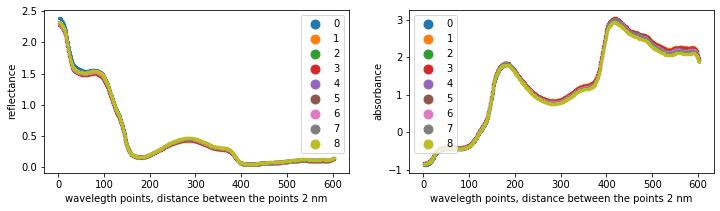

In [274]:
absorbance = np.empty((temp.shape))

for i in range(0, temp.shape[0]):
    for j in range(0, temp.shape[1]):
        absorbance[i, j] = np.log(1.0/temp[i, j])

fig, axes = plt.subplots(1, 2, figsize = (12, 3))

for i in range(0, temp.shape[0]):
    axes[0].scatter(cs, temp[i, :], c=None, label=i, s=5)
axes[0].set_xlabel('wavelegth points, distance between the points 2 nm')
axes[0].set_ylabel('reflectance')
axes[0].legend(markerscale=4)

for i in range(0, absorbance.shape[0]):
    axes[1].scatter(cs, absorbance[i, :], c=None, label=i, s=5)
axes[1].set_xlabel('wavelegth points, distance between the points 2 nm')
axes[1].set_ylabel('absorbance')
axes[1].legend(markerscale=4)

plt.show()

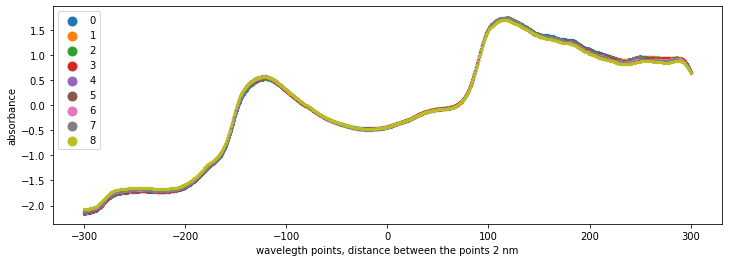

In [276]:
absorb_mean = np.empty((absorbance.shape))

# Take away the mean, convert np.array to lists for compatibility with np.cov
x = list(cs - cs.mean())

fig, axes = plt.subplots(1, 1, figsize = (12, 4))

for i in range(0, absorbance.shape[0]):
    absorb_mean[i] = absorbance[i] - absorbance[i].mean()
    axes.scatter(x, absorb_mean[i], c=None, label=i, s=5)
axes.set_xlabel('wavelegth points, distance between the points 2 nm')
axes.set_ylabel('absorbance')
axes.legend(markerscale=4)

plt.show()

In [282]:
# Calculate the covariance matrices
# Since we are dealing with 2D datasets (bivariate data), the covariance matrix will be 2×2
covmat_list = [] # declate an empty list to add covariance matrices in it
for i in range(0, absorb_mean.shape[0]):
    covmat = np.cov([x, absorb_mean[0]], rowvar=True) # rowvar=True to get 2x2 covariance matrix from a 2D array
    covmat_list.append(covmat)
print(covmat_list)

[array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]]), array([[3.01501667e+04, 1.68551499e+02],
       [1.68551499e+02, 1.25620598e+00]])]


In [293]:
# Find eigenvalues and eigenvectors of the covariance matrix
w,v = np.linalg.eig(covmat_list[0]) # returns w (eigenvalues) und v (eigenvectors of unit length)

# Get the index of the largest eigenvalue
maxeig = np.argmax(w)

# Get the slope of the line passing through the origin and the largest eigenvector
m = -v[maxeig, 1]/v[maxeig, 0]
line = [m*i for i in x]

<class 'list'>


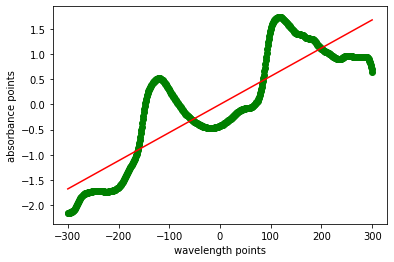

In [296]:
# That’s it! Now we just need to plot the first principal component on top of the data.

plt.scatter(x, absorb_mean[0], c='g')
plt.xlabel('wavelength points')
plt.ylabel('absorbance points')
plt.plot(x, line, color='r')
plt.axis('tight')
plt.show()



In [299]:
from sklearn.decomposition import PCA
datazip = list(zip(x,absorb_mean[0]))
pca = PCA(n_components=2)
pca.fit(datazip)

# Print the eigenvectors
print(pca.components_) # pca_components_ lists the eigenvectors
# This is equivalent to the matrix w we found with the step-by-step example,
# with the only (handy) difference that the eigenvectors are already sorted
# in decreasing order. That means the principal component is pca_components_[0].

[[-0.99998437 -0.00559037]
 [-0.00559037  0.99998437]]


# PCA of NIR spectra
 Code source: https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/

PCA is nearly invariably used in the analysis of NIR data, and for a very good reason. Typical NIR spectra are acquired at many wavelengths. With our Brimrose Luminar 5030, we typically acquire 601 wavelength points with an interval of 2 nm.

601 data points for each spectra are, in general, a very redundant set. NIR spectra are fairly information-poor, that is they never contains sharp features, such as absorption peaks, as it may be the case for Raman or MIR spectroscopy. For this reason, most of the features of NIR spectra at different wavelengths are highly correlated.

That is where PCA comes into play. PCA is very efficient at performing dimensionality reduction in multidimensional data which display a high level of correlation. PCA will get rid of correlated components in the data by projecting the multidimensional data set (601 dimensions for our spectrometer) to a much lower dimensionality space, often a few, or even just two, dimensions.

We are going to use NIR spectra from milk samples with a varying concentration of lactose. We prepared the samples by mixing normal milk and lactose-free milk in different concentrations.
### The aim is to find out whether PCA applied to the spectra can be useful to discriminate between the different concentrations.

The data is in a csv file containing 450 scans. Each scan is identified with a label (from 1 to 9) identifying the sample that was scanned. Each sample was scanned 50 times and the difference between samples was in the relative content of milk and lactose-free milk. The data is available for download at our Github repository.

In [1]:
# We run this example using Python 3.5.2. Here’s the list of the import we need on the first step.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca # Principal Component Analysis, singular value decomposition
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance:
# z = (x - u) / s, where u is the mean and s is the standard deviation
from sklearn import svm
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('D:/Weiterbildung/Data Science/NIR/Data/milk.csv') # Import data from csv
# The first column of the Data Frame contains the labels
lab = data.values[:,1].astype('uint8') 
# Read the features (scans) and transform data from reflectance to absorbance
# np.log takes natural logarithm, element-wise
feat = np.log(1.0/(data.values[:,2:]).astype('float32'))
# Calculate first derivative applying a Savitzky-Golay filter
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

In [26]:
data

,Unnamed: 0,labels,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,601,602
0,1/02/2018,1,2.397526,2.394200,2.388952,2.381282,2.371906,2.360940,2.349092,2.336749,...,0.109473,0.111015,0.113123,0.115745,0.118939,0.122773,0.127250,0.132313,0.137997,0.144151
1,1/02/2018.1,1,2.399526,2.396723,2.391678,2.383280,2.372825,2.361160,2.348541,2.336346,...,0.108937,0.110649,0.112845,0.115586,0.118847,0.122642,0.127013,0.131837,0.137191,0.143028
2,1/02/2018.2,1,2.396475,2.393600,2.388446,2.380985,2.371319,2.359930,2.348114,2.336348,...,0.108358,0.110062,0.112391,0.115298,0.118736,0.122774,0.127359,0.132500,0.138217,0.144524
3,1/02/2018.3,1,2.406880,2.404243,2.399203,2.391142,2.380536,2.368569,2.356339,2.344046,...,0.110105,0.111836,0.114057,0.116744,0.119888,0.123524,0.127728,0.132561,0.138030,0.144085
4,1/02/2018.4,1,2.409883,2.407017,2.401310,2.392669,2.381365,2.368603,2.355518,2.342792,...,0.110129,0.111469,0.113277,0.115589,0.118503,0.122092,0.126346,0.131227,0.136840,0.143176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1/02/2018.45,9,2.342263,2.340977,2.336841,2.329997,2.320566,2.309092,2.296712,2.283835,...,0.124549,0.126137,0.128178,0.130633,0.133496,0.136854,0.140747,0.145175,0.150136,0.155510
446,1/02/2018.46,9,2.341321,2.337928,2.331601,2.322100,2.310171,2.296914,2.284369,2.272224,...,0.120460,0.122389,0.124718,0.127474,0.130560,0.134146,0.138140,0.142645,0.147620,0.153031
447,1/02/2018.47,9,2.332630,2.328758,2.322815,2.314416,2.303985,2.292807,2.281126,2.269446,...,0.121400,0.123081,0.125230,0.127813,0.130817,0.134254,0.138230,0.142814,0.148050,0.153915
448,1/02/2018.48,9,2.332112,2.328909,2.323220,2.314949,2.304700,2.293027,2.281397,2.270268,...,0.123051,0.124545,0.126341,0.128536,0.131220,0.134530,0.138494,0.143144,0.148405,0.154305


## dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)
This last step is very important when analysing NIR spectroscopy data. Taking the first derivative of the data enables to correct for baseline differences in the scans, and highlight the major sources of variation between the different scans. Numerical derivatives are generally unstable, so we use the smoothing filter implemented in scipy.signal import savgol_filter to smooth the derivative data out.

## Savitzky-Golay-Filter
Das Savitzky-Golay-Filter ist ein mathematischer Glättungsfilter in der Signalverarbeitung. Er wurde erstmals 1964 von Abraham Savitzky und Marcel J. E. Golay beschrieben. Quelle: https://de.wikipedia.org/wiki/Savitzky-Golay-Filter

Es leistet im Wesentlichen eine polynomiale Regression (k-ten Grades) über einer Serie von Werten (auf wenigstens k+1 Stützstellen, die als äquidistant behandelt werden), um einen geglätteten Wert für jeden Punkt zu bestimmen. Ein Vorteil des Savitzky-Golay-Filters ist, dass, anders als bei anderen Glättungsfiltern, Anteile von hohen Frequenzen nicht einfach abgeschnitten werden, sondern in die Berechnung mit einfließen. Dadurch zeigt der Filter ausgezeichnete Eigenschaften der Verteilung wie relative Maxima, Minima und Streuung zu erhalten, die von herkömmlichen Methoden wie der Bildung des gleitenden Mittelwerts gewöhnlich durch Abflachung oder Verschiebung verfälscht werden.

Angewendet wird das Savitzky-Golay-Filter in der Spektroskopie. Die Erstveröffentlichung von Savitzky und Golay wird von einigen Autoren als eine der wichtigsten und meistzitierten Grundlagenveröffentlichungen im Bereich der computergestützten Numerik eingeschätzt.

## Literatur:
[1] Abraham. Savitzky, M. J. E. Golay: Smoothing and Differentiation of Data by Simplified Least Squares Procedures. In: Analytical Chemistry. Band 36, Nr. 8, 1. Juni 1964, S. 1627–1639, doi:10.1021/ac60214a047. [2] Hans Lohninger: Savitzky-Golay-Filter - Koeffizienten. Grundlagen der Statistik, 19. März 2011. [3] James Riordon, Elizabeth Zubritsky, Alan Newman: Top 10 Articles. In: Analytical Chemistry. Band 72, Nr. 9, 2000, S. 324A–329 A, doi:10.1021/ac002801q.

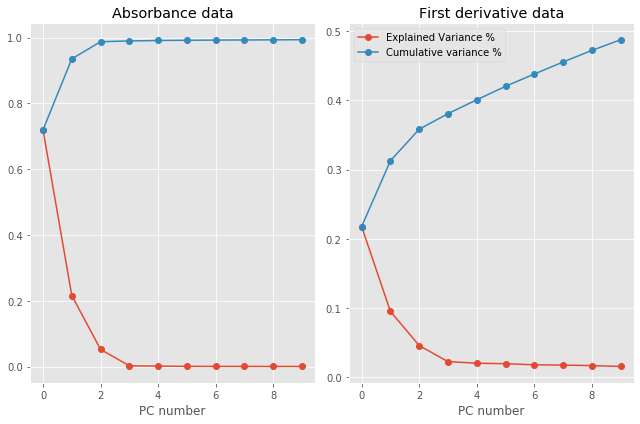

In [3]:
# Initialise Principal Component Analysis
skpca1 = sk_pca(n_components=10) # PCA: number of components to keep
skpca2 = sk_pca(n_components=10) # PCA: number of components to keep
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)
# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_ # Percentage of variance explained by each of the selected components
# Fit the first data and extract the explained variance ratio
X2 = skpca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_ # Percentage of variance explained by each of the selected components
# Plot data
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
    ax1.plot(expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
    ax2.plot(expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
    plt.legend()
    plt.show()

In [4]:
skpca2 = sk_pca(n_components=4) # we set the number of principal components to 4
# Transform on the scaled features
Xt2 = skpca2.fit_transform(nfeat2)

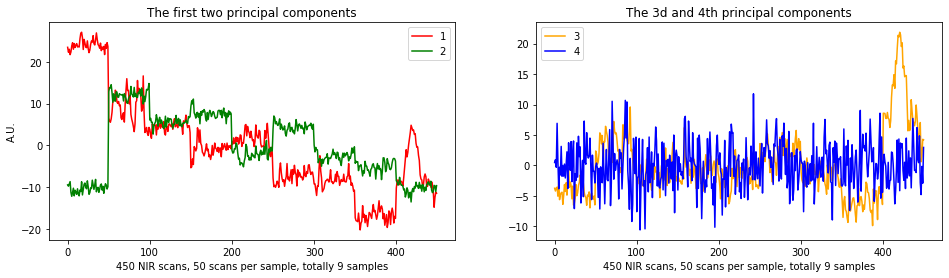

In [76]:
# create a figure to draw on
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4)) # Create a figure and a set of subplots: plt.subplots(nrows, ncolumns)

ax1.plot(Xt2[:,0], 'red')
ax1.plot(Xt2[:,1], 'green')
ax2.plot(Xt2[:,2], 'orange')
ax2.plot(Xt2[:,3], 'blue')

ax1.set_title('The first two principal components')
ax1.set_xlabel('450 NIR scans, 50 scans per sample, totally 9 samples')
ax1.set_ylabel('A.U.')
ax1.legend(labels=['1', '2'])

ax2.set_title('The 3d and 4th principal components')
ax2.set_xlabel('450 NIR scans, 50 scans per sample, totally 9 samples')
ax2.legend(labels=['3', '4'])
plt.show()

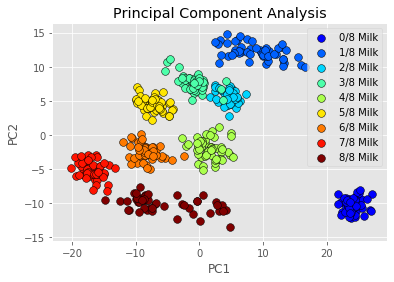

In [11]:
# Define the labels for the plot legend
labplot = ["0/8 Milk","1/8 Milk","2/8 Milk", "3/8 Milk", \
"4/8 Milk", "5/8 Milk","6/8 Milk","7/8 Milk", "8/8 Milk"]
# Scatter plot
unique = list(set(lab)) # labels of the original data
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

## Principal components
The principal components are the linear combinations of the original variables that account for the variance in the data. The maximum number of components extracted always equals the number of variables.

### Source:
https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/